In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:

df = pd.read_csv("astronauts.csv", sep=";").replace({np.nan: None}) #.fillna(value=None)

for k in ['Hours/mission', 'Total hrs (sum)', 'EVA hrs/mission', 'Total EVA hrs' ]:
    df[k] = df[k].str.replace(",", ".").astype('float64')

df['Decade of mission'] = ((df['Year of mission']/10).apply(np.floor)*10).astype(int)
    
df.head(5)

ID  Number  Nationwide number                 Name  \
0   1       1                  1        Gagarin, Yuri   
1   2       2                  2       Titov, Gherman   
2   3       3                  1  Glenn, John H., Jr.   
3   4       3                  1  Glenn, John H., Jr.   
4   5       4                  2  Carpenter, M. Scott   

             Original name Sex  Year of birth     Nationality  \
0  ГАГАРИН Юрий Алексеевич   M           1934  U.S.S.R/Russia   
1  ТИТОВ Герман Степанович   M           1935  U.S.S.R/Russia   
2      Glenn, John H., Jr.   M           1921            U.S.   
3      Glenn, John H., Jr.   M           1921            U.S.   
4      Carpenter, M. Scott   M           1925            U.S.   

  Military/Civilian               Selection  Year of Selection  \
0               Mil                  TsPK-1               1960   
1               Mil                  TsPK-1               1960   
2               Mil  NASA Astronaut Group 1               1959   
3               Mil  NASA Astronaut Group 2               1959   
4               Mil                 NASA- 1               1959   

   mission number  total number of missions Occupation  Year of mission  \
0               1                         1      pilot             1961   
1               1                         1      pilot             1961   
2               1                         2      pilot             1962   
3               2                         2        PSP             1998   
4               1                         1      Pilot             1962   

     Mission title   Ascend shuttle         In orbit  Descend shuttle  \
0         Vostok 1         Vostok 1         Vostok 2         Vostok 3   
1         Vostok 2         Vostok 2         Vostok 2         Vostok 2   
2             MA-6             MA-6             MA-6             MA-6   
3           STS-95           STS-95           STS-95           STS-95   
4  Mercury-Atlas 7  Mercury-Atlas 7  Mercury-Atlas 7  Mercury-Atlas 7   

   Hours/mission  Total hrs (sum)  Field21  EVA hrs/mission  Total EVA hrs  \
0           1.77             1.77        0              0.0            0.0   
1          25.00            25.30        0              0.0            0.0   
2           5.00           218.00        0              0.0            0.0   
3         213.00           218.00        0              0.0            0.0   
4           5.00             5.00        0              0.0            0.0   

   Decade of mission  
0               1960  
1               1960  
2               1960  
3               1990  
4               1960

In [3]:
print(len(df))
df.describe()

1277


ID       Number  Nationwide number  Year of birth  \
count  1277.000000  1277.000000        1277.000000    1277.000000   
mean    639.000000   274.233359         128.754111    1951.683634   
std     368.782456   148.185389          97.263590      11.435117   
min       1.000000     1.000000           1.000000    1921.000000   
25%     320.000000   153.000000          47.000000    1944.000000   
50%     639.000000   278.000000         110.000000    1952.000000   
75%     958.000000   390.000000         204.000000    1959.000000   
max    1277.000000   565.000000         433.000000    1983.000000   

       Year of Selection  mission number  total number of missions  \
count         1277.00000     1277.000000               1277.000000   
mean          1985.58888        1.992169                  2.982772   
std             12.21917        1.145361                  1.400745   
min           1959.00000        1.000000                  1.000000   
25%           1978.00000        1.000000                  2.000000   
50%           1987.00000        2.000000                  3.000000   
75%           1995.00000        3.000000                  4.000000   
max           2018.00000        7.000000                  7.000000   

       Year of mission  Hours/mission  Total hrs (sum)      Field21  \
count      1277.000000    1277.000000      1277.000000  1277.000000   
mean       1994.597494    1050.883984      2968.341410     0.628818   
std          12.583237    1714.791959      4214.715104     1.165753   
min        1961.000000       0.000000         0.610000     0.000000   
25%        1986.000000     190.030000       482.000000     0.000000   
50%        1995.000000     261.000000       932.000000     0.000000   
75%        2003.000000     382.000000      4264.000000     1.000000   
max        2019.000000   10505.000000     21083.520000     7.000000   

       EVA hrs/mission  Total EVA hrs  Decade of mission  
count      1277.000000    1277.000000        1277.000000  
mean          3.661287      10.761410        1990.148786  
std           7.287245      16.045247          12.708195  
min           0.000000       0.000000        1960.000000  
25%           0.000000       0.000000        1980.000000  
50%           0.000000       0.000000        1990.000000  
75%           4.720000      19.520000        2000.000000  
max          89.130000      78.800000        2010.000000

In [4]:
df['Mission title'].value_counts().head(10)

Salyut 7    24
Salyut 6    14
24           9
2            9
STS          9
3            8
20           8
STS-42       8
STS-39       7
STS-47       7
Name: Mission title, dtype: int64

In [5]:
df["Nationality"].value_counts()

U.S.                        854
U.S.S.R/Russia              273
Japan                        20
France                       18
Canada                       18
Germany                      16
China                        14
Italy                        13
U.K./U.S.                     6
Australia                     4
Switzerland                   4
Netherland                    3
Belgium                       3
Sweden                        2
Spain                         2
U.K.                          2
Bulgaria                      2
Mexico                        1
Republic of South Africa      1
Kazakhstan                    1
Denmark                       1
Korea                         1
Malysia                       1
Mongolia                      1
Brazil                        1
Romania                       1
Israel                        1
Czechoslovakia                1
Slovakia                      1
Syria                         1
Poland                        1
U.S.S.R/

In [6]:

df.groupby(['Original name', 'Number', 'Nationality'])['Total hrs (sum)'].max().reset_index().head(10)

Original name  Number Nationality  Total hrs (sum)
0           Acaba, Joseph M.     491        U.S.          7272.23
1        Acton, Loren Wilbur     177        U.S.           190.94
2          Adamson, James C.     220        U.S.           334.00
3           Akers, Thomas D.     235        U.S.           814.00
4  Aldrin, Edwin Eugene, Jr.      29        U.S.           289.00
5           Allen, Andrew M.     279        U.S.           904.00
6           Allen, Joseph P.     113        U.S.           314.00
7           Altman, Scott D.     377        U.S.          1224.00
8     Anders, William Alison      33        U.S.           147.00
9       Anderson, Clayton C.     460        U.S.          4046.00

In [7]:
#df[  df['total number of missions'] == df['total number of missions'].max() ]

----

In [11]:
df.groupby(['Original name', 'Number', 'Nationality'])['Total hrs (sum)'].max().reset_index().head(10)

Original name  Number Nationality  Total hrs (sum)
0           Acaba, Joseph M.     491        U.S.          7272.23
1        Acton, Loren Wilbur     177        U.S.           190.94
2          Adamson, James C.     220        U.S.           334.00
3           Akers, Thomas D.     235        U.S.           814.00
4  Aldrin, Edwin Eugene, Jr.      29        U.S.           289.00
5           Allen, Andrew M.     279        U.S.           904.00
6           Allen, Joseph P.     113        U.S.           314.00
7           Altman, Scott D.     377        U.S.          1224.00
8     Anders, William Alison      33        U.S.           147.00
9       Anderson, Clayton C.     460        U.S.          4046.00

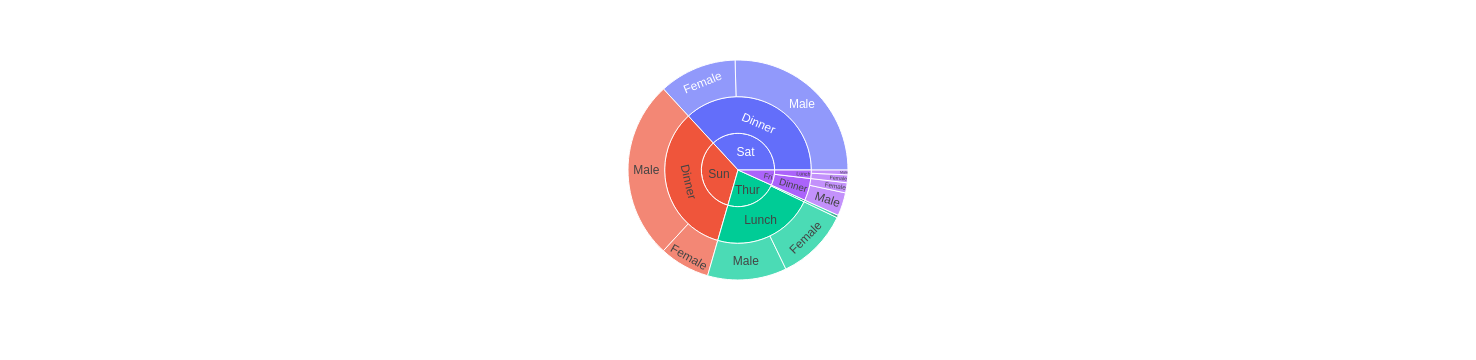

In [9]:
import plotly.express as px
dftips = px.data.tips()
fig = px.sunburst(dftips, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

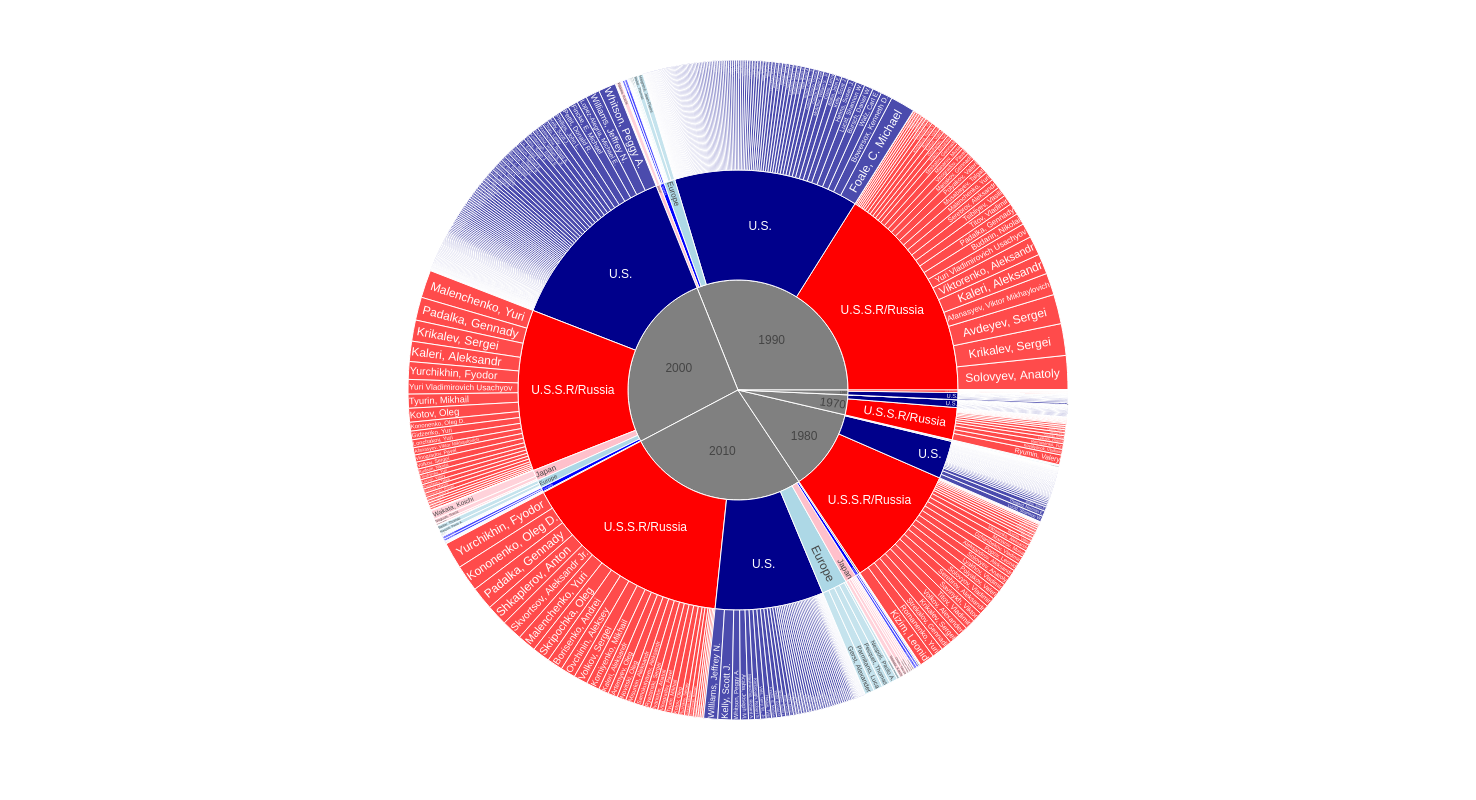

In [10]:
import plotly.express as px


data = df[ ['Decade of mission', 'Nationality', 'Name', 'Total hrs (sum)']  ].sort_values('Decade of mission')


data = data[  data['Nationality'].isin(['U.S.','U.S.S.R/Russia','Japan','France','Canada','Germany','China','Italy',]) ]
data = data.replace({'France':'Europe', 'Italy':'Europe', 'Germany':'Europe'})


fig =px.sunburst(
    data,
    path=['Decade of mission', 'Nationality', 'Name'],
    values='Total hrs (sum)',
    
    color='Nationality', 
    color_discrete_map={'(?)':'gray', 
                        'U.S.':'darkblue', 
                        'U.S.S.R/Russia':'red', 
                        'Europe':'lightblue',
                        'Japan':'pink',
                        'Canada':'blue',
                        'China':'lightred'
                       },
    width=800, 
    height=800
)
fig.show()


In [16]:
data = data.drop_duplicates()

In [20]:
data.reset_index(drop=True, inplace=True)

In [22]:
data.sample(10)

Decade of mission     Nationality                        Name  \
349               1990            U.S.          Lawrence, Wendy B.   
628               2000            U.S.            Altman, Scott D.   
670               2010            U.S.        Bresnik, Randolph J.   
46                1970          Europe               Jahn, Sigmund   
72                1970            U.S.  Bartoe, John-David Francis   
365               1990  U.S.S.R/Russia            Budarin, Nikolai   
135               1980            U.S.           Hawley, Steven A.   
292               1990           Japan               Mukai, Chiaki   
762               2010            U.S.            Nyberg, Karen L.   
598               2000            U.S.        Cockrell, Kenneth D.   

     Total hrs (sum)  
349          1226.00  
628          1224.00  
670          3587.93  
46            188.82  
72            190.94  
365         10657.42  
135           768.00  
292           568.00  
762          4320.00  
598          1560.00

In [24]:
import plotly.graph_objects as go

In [252]:
color_dictionary = {'(?)':'gray', 
                        'U.S.':'deepskyblue', 
                        'U.S.S.R/Russia':'red', 
                        'Europe':'lightblue',
                        'Japan':'pink',
                        'Canada':'blue',
                        'China':'lightpink'
                       }

In [253]:
source = []
target = []
value = []
labels = []
color = []
counter = 0

In [254]:
def populate_tables(passed_data):
    labels.append(passed_data['Decade of mission'][0])
    color.append('orangered')
    global counter
    local_counter = counter
    counter = counter + 1
    for i in passed_data['Nationality'].unique():
        source.append(local_counter)
        target.append(counter)
        local_counter2 = counter
        counter = counter+1
        national_time = passed_data[passed_data['Nationality']==i]['Total hrs (sum)'].sum()
        value.append(national_time)
        labels.append(i)
        color.append(color_dictionary[i])
        
        size_of_slice = 8
        
        for j in passed_data[passed_data['Nationality'] == i]['Name'].head(size_of_slice):
            source.append(local_counter2)
            target.append(counter)
            counter = counter+1
            individual_time = passed_data[ (passed_data['Nationality']==i) & (passed_data['Name']==j) ]['Total hrs (sum)']
            value.append(individual_time)
            labels.append(j)
            color.append(color_dictionary[i])
            
        individual_time_sum = passed_data[passed_data['Nationality'] == i]['Total hrs (sum)'].head(size_of_slice).sum()
        
        if individual_time_sum < national_time:
            source.append(local_counter2)
            target.append(counter)
            counter = counter+1
            value.append(national_time - individual_time_sum)
            labels.append('Others')
            color.append(color_dictionary[i])

In [255]:
years_list = [i for i in data['Decade of mission'].unique()]
years_list.sort(reverse=True)

In [256]:
for i in years_list:
    populate_tables(data[data['Decade of mission']==i].reset_index(drop=True))

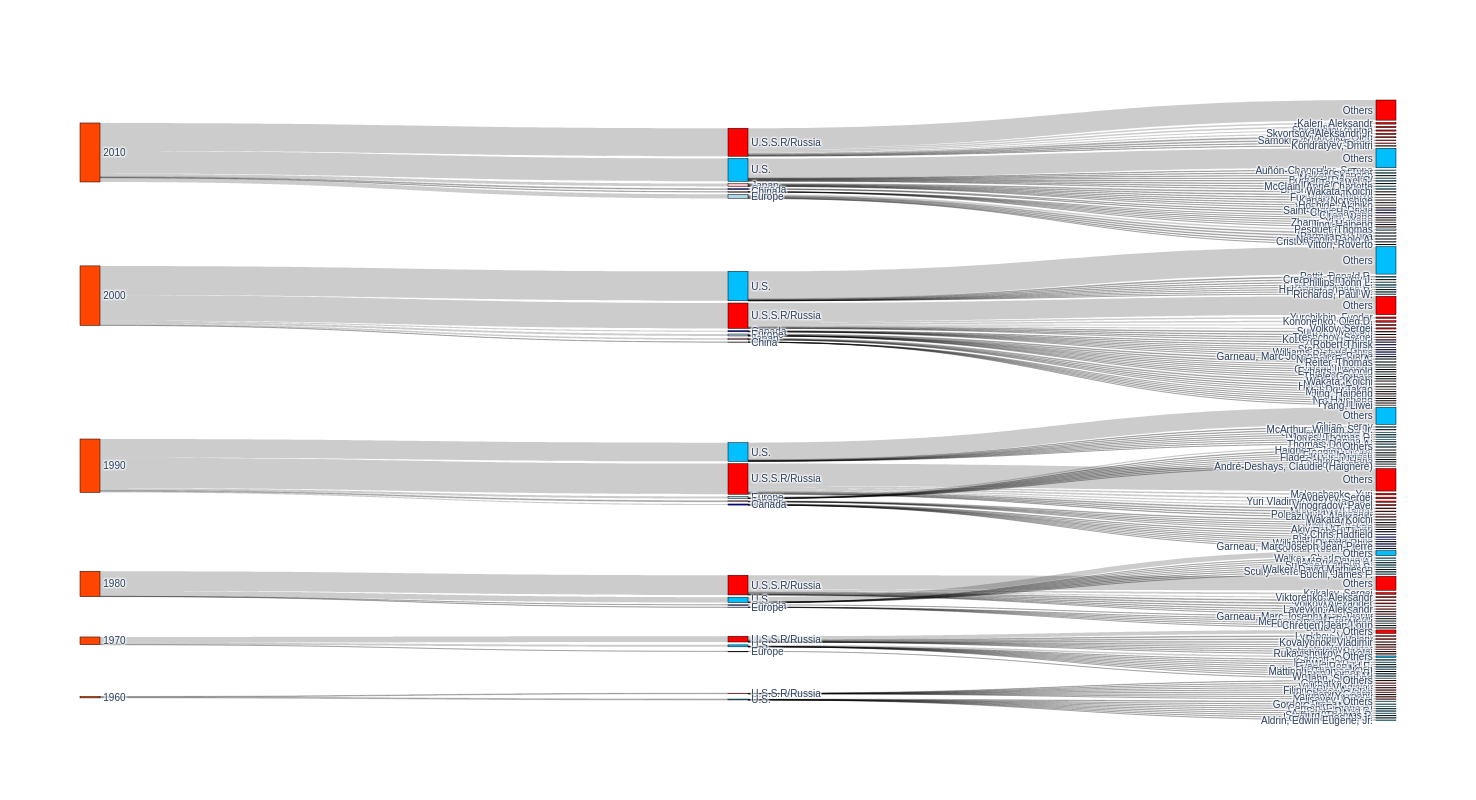

In [260]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = color
    ),
    link = dict(
      source = source,
      target = target,
      value = value
  ))])

fig.update_layout(title_text="", font_size=10, width=1200, height=800)
fig.show()